<a href="https://colab.research.google.com/github/bosecodes/DL-with-Python/blob/master/MNIST_Fashion_using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# MNIST Fashion

# MNIST Fashion

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Activation
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print()
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


## **Display the Apparel**


In [3]:
# Display as text

#from Ipython.display import display
import pandas as pd

print('Shape of dataset: {}'.format(X_train.shape))
print('Labels: {}'.format(y_train))

# Single MNIST digit
single = X_train[0]
print('Shape of single: {}'.format(single.shape))
display(pd.DataFrame(single.reshape(28,28)))

Shape of dataset: (60000, 28, 28)
Labels: [9 0 0 ... 3 0 5]
Shape of single: (28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


Image (#90): Which is fashion apparel no. 9


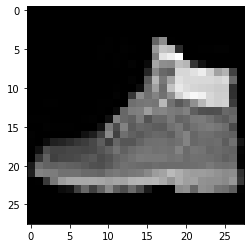

In [5]:
# Display as image

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 90 # change to choose a new article
a = X_train[digit]
plt.imshow(a, cmap = 'gray', interpolation = 'nearest')
print('Image (#{}): Which is fashion apparel no. {}'.format(digit, y_train[digit]))

<Figure size 432x288 with 0 Axes>

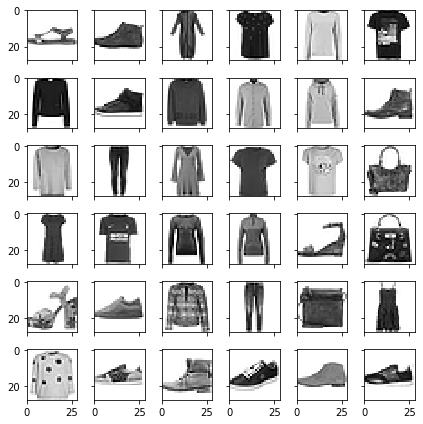

In [6]:
import random

ROWS = 6
random_indices = random.sample(range(X_train.shape[0]), ROWS*ROWS)

sample_images = X_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

# Training/Fitting CNN - Fashion

The following code will train the CNN for 20000 steps. This can take a while, you might want to scale the step count back. GPU training might help.


In [7]:
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

#input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first' :
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape : ', X_train.shape)
print('Training samples: {}'.format(X_train.shape[0]))
print(f'Testing samples: {X_test.shape[0]}')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Creating the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

X_train shape :  (60000, 28, 28, 1)
Training samples: 60000
Testing samples: 10000





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [8]:
import tensorflow as tf
import time

start_time = time.time()

model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 2,
          validation_data = [X_test, y_test])
score = model.evaluate(X_test, y_test, verbose = 0)

print(f'Test loss : {score[0]}')
print(f'Test Accuracy : {score[1]}')

elapsed_time = time.time() - start_time

print(f'Elapsed Time : {elapsed_time}')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





 - 18s - loss: 0.5454 - acc: 0.8078 - val_loss: 0.3467 - val_acc: 0.8777
Epoch 2/12
 - 4s - loss: 0.3563 - acc: 0.8735 - val_loss: 0.2930 - val_acc: 0.8956
Epoch 3/12
 - 4s - loss: 0.3056 - acc: 0.8902 - val_loss: 0.2673 - val_acc: 0.9013
Epoch 4/12
 - 4s - loss: 0.2767 - acc: 0.8990 - val_loss: 0.2572 - val_acc: 0.9033
Epoch 5/12
 - 4s - loss: 0.2529 - acc: 0.9097 - val_loss: 0.2333 - val_acc: 0.9147
Epoch 6/12
 - 4s - loss: 0.2309 - acc: 0.9150 - val_loss: 0.2331 - val_acc: 0.9185
Epoch 7/12
 - 4s - loss: 0.2120 - acc: 0.9221 - val_loss: 0.2211 - val_acc: 0.9233
Epoch 8/12
 - 4s - loss: 0.1970 - acc: 0.9268 - val_loss: 0.2130 - val_acc: 0.9247
Epoch 9/12
 - 4s - loss: 0.1837 - acc: 0.9314 - val_loss: 0.2169 - val_acc: 0.9235
Epoch 10/12
 - 4s - loss: 0.1704 - acc: 0.9362 - val_loss: 0.2110 - val_acc: 0.9274
Epoch 11/12
 - 4